In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [83]:
df = pd.read_csv("Data/hitters.csv")
df = pd.get_dummies(df)
df = df.fillna(df.mean())

X = df.drop(['Salary'], axis=1)
y = df['Salary']

In [84]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [85]:
objeto_pca = pipeline.named_steps['pca']

In [86]:
X_pca = pipeline.transform(X)
X_componentes = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X.shape[1])])

In [87]:
objeto_pca.explained_variance_ratio_[0]

0.33772473456300156

In [88]:
objeto_pca.explained_variance_ratio_[1]

0.19400888651570464

In [89]:
objeto_pca.explained_variance_ratio_[2]

0.16709742723491242

Text(0, 0.5, 'PC2')

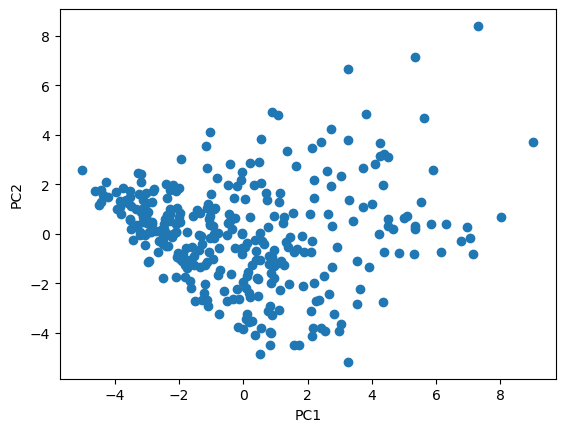

In [90]:
plt.scatter(X_componentes['PC1'], X_componentes['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/

Text(0, 0.5, 'Inertia')

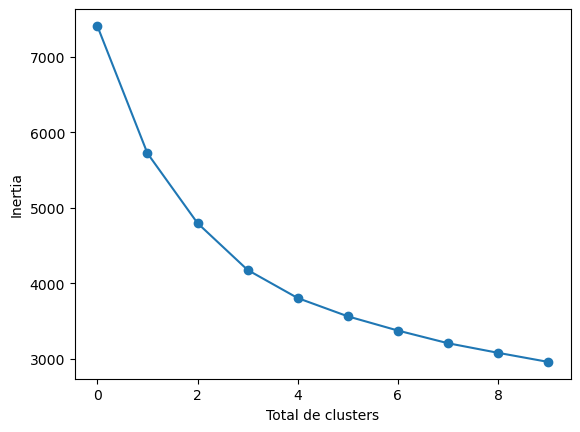

In [91]:
df = df.copy().dropna()

inertias = []

K_range = range(1, 11)
for i in K_range:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=i, random_state=42))
    ])
    pipeline.fit(df)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)

plt.plot(inertias, marker='o')
plt.xlabel('Total de clusters')
plt.ylabel('Inertia')

In [92]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])
pipeline.fit(X)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

In [93]:
X_componentes['cluster'] = pipeline.predict(X) + 1

Text(0, 0.5, 'Componente2')

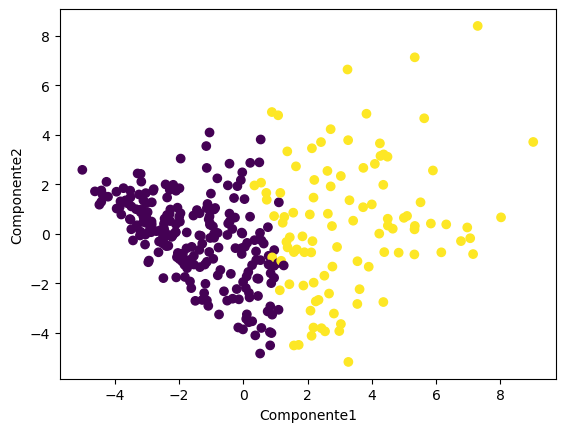

In [94]:
plt.scatter(X_componentes['PC1'], X_componentes['PC2'], c=X_componentes['cluster'])
plt.xlabel("Componente1")
plt.ylabel("Componente2")

# XGBoost

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBRegressor(
    n_estimators=10000,
    max_depth=5,
    learning_rate = 0.1,
    reg_lambda=0.1,
    subsample = 0.5,
    col_sample_by_tree = 0.8,
    tree_method='hist'
)

model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=20, verbose=100)


[12:58:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_sample_by_tree" } are not used.

[0]	validation_0-rmse:600.80063	validation_1-rmse:665.45821
[52]	validation_0-rmse:90.67125	validation_1-rmse:337.44807


/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             col_sample_by_tree=0.8, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [96]:
predicciones = model.predict(X_test)
r2 = r2_score(y_test, predicciones)
r2

0.430630138189531

In [97]:
Xcomponentes_train, Xcomponentes_test, y_train, y_test = train_test_split(X_componentes, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=10000,
    max_depth=5,
    learning_rate = 0.1,
    reg_lambda=0.1,
    subsample = 0.5,
    col_sample_by_tree = 0.8,
    tree_method='hist'
)

model.fit(Xcomponentes_train, y_train, eval_set=[(Xcomponentes_train, y_train), (Xcomponentes_test, y_test)], early_stopping_rounds=20, verbose=100)

[12:58:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_sample_by_tree" } are not used.

[0]	validation_0-rmse:605.34694	validation_1-rmse:669.37055


/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[76]	validation_0-rmse:45.48800	validation_1-rmse:320.10435


XGBRegressor(base_score=None, booster=None, callbacks=None,
             col_sample_by_tree=0.8, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [98]:
predicciones = model.predict(Xcomponentes_test)
r2 = r2_score(y_test, predicciones)
r2

0.4581306192383735

In [99]:
componentes3 = X_componentes.iloc[:, :3]
 
X3_train, X3_test, y_train, y_test = train_test_split(componentes3, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=10000,
    max_depth=5,
    learning_rate = 0.1,
    reg_lambda=0.1,
    subsample = 0.5,
    col_sample_by_tree = 0.8,
    tree_method='hist'
)

model.fit(X3_train, y_train, eval_set=[(X3_train, y_train), (X3_test, y_test)], early_stopping_rounds=20, verbose=100)

[12:58:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "col_sample_by_tree" } are not used.

[0]	validation_0-rmse:604.80304	validation_1-rmse:669.37014


/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[63]	validation_0-rmse:104.60690	validation_1-rmse:309.54750


XGBRegressor(base_score=None, booster=None, callbacks=None,
             col_sample_by_tree=0.8, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [100]:
predicciones = model.predict(X3_test)
r2 = r2_score(y_test, predicciones)
r2

0.5393820573590736

# Conclusiones

Al calcular los componentes y revisar los 3 principales y calcular su reducción de varianza, vemos que el primero tiene una reducción de varianza de 0.3377, el segundo con una reducción de 0.1940 y el tercero una reducción de 0.167

Aplicando XGBoost con diferentes caracteristicas, primero vemos que el modelo utilizando todas las variables nos da un r2 de 0.43, utilizando los componentes se obtiene un r2 de 0.45 y por último utilizando los 3 principales componentes se obtiene un r2 de 0.53 siendo este último el mejor modelo ya que es el que tiene un r2 más alto.